# Classification of the class object based on several variables to predict whether the celestial object is a star or a galaxy or a quasar.
Team: Nupur Harmalkar , Nianchen Xu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
%matplotlib inline

# Load dataset

In [4]:
df=pd.read_csv("C:/Users/Nupur Harmalkar/Documents/BUSINESS INTELLIGENCE/Project/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv")

In [5]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
objid        100000 non-null int64
ra           100000 non-null float64
dec          100000 non-null float64
u            100000 non-null float64
g            100000 non-null float64
r            100000 non-null float64
i            100000 non-null float64
z            100000 non-null float64
run          100000 non-null int64
rerun        100000 non-null int64
camcol       100000 non-null int64
field        100000 non-null int64
specobjid    100000 non-null uint64
class        100000 non-null object
redshift     100000 non-null float64
plate        100000 non-null int64
mjd          100000 non-null int64
fiberid      100000 non-null int64
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+ MB


In [17]:
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'plate', 'mjd', 'fiberid', 'field'], axis=1, inplace=True)

In [18]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,0.170621
std,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,0.437571
min,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,-0.004136
25%,136.356526,6.770380,18.212902,16.852982,16.196608,15.865275,15.619960,0.000001
50%,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,0.045997
75%,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,0.095429
max,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,7.011245


# Boxplots and Histogram

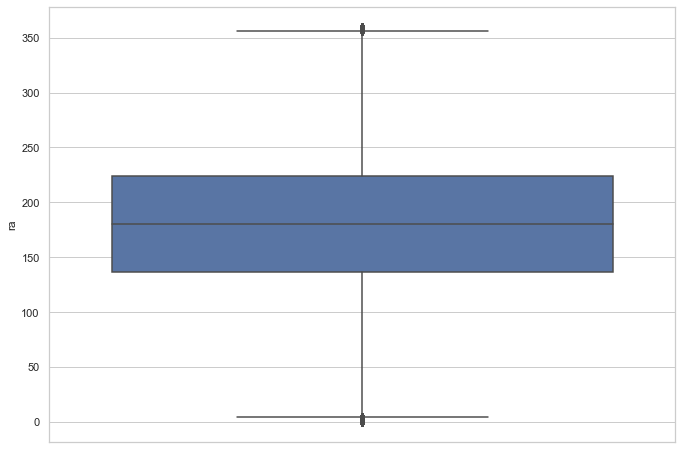

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='ra', data=df, orient="v")

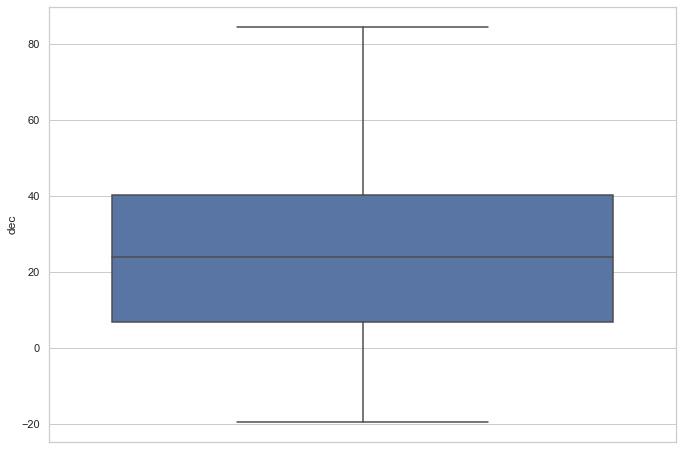

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='dec', data=df, orient="v")

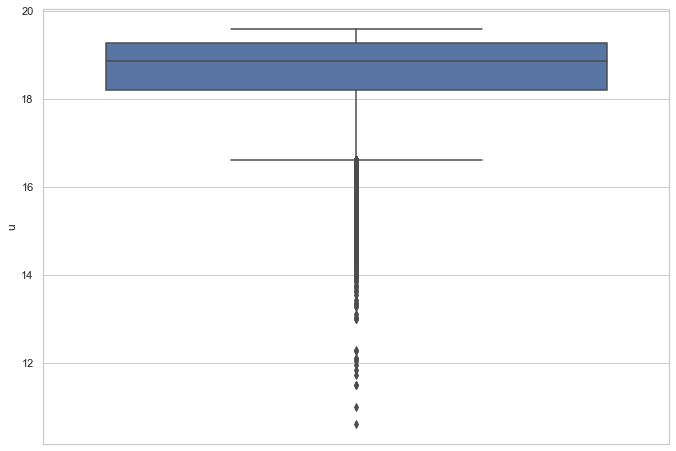

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='u', data=df, orient="v")

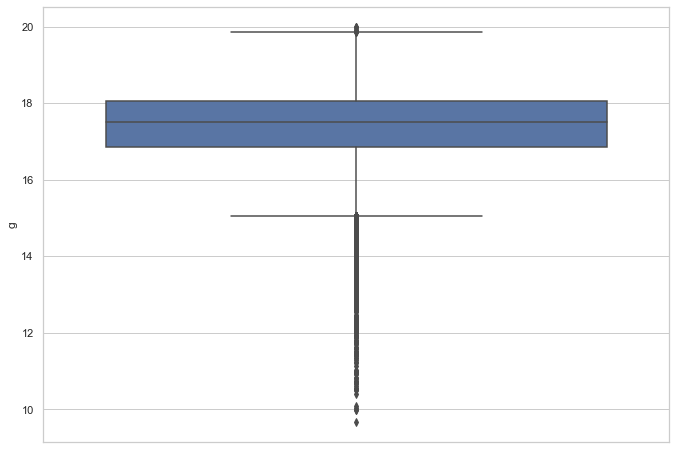

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='g', data=df, orient="v")

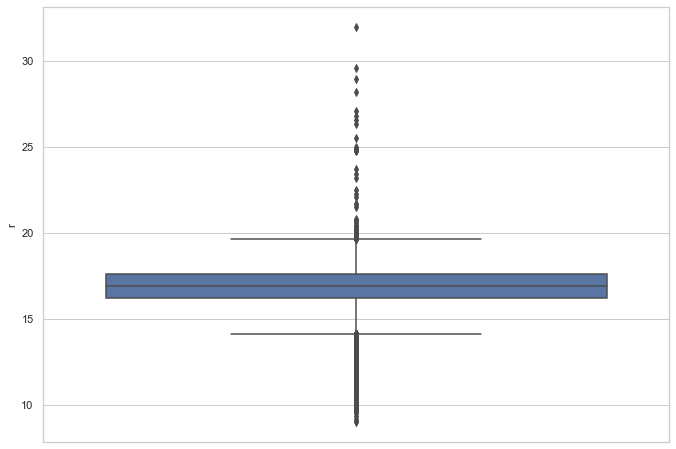

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='r', data=df, orient="v")

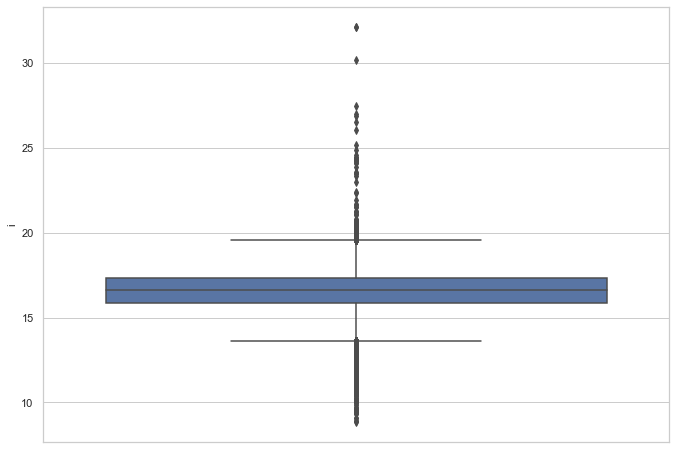

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='i', data=df, orient="v")

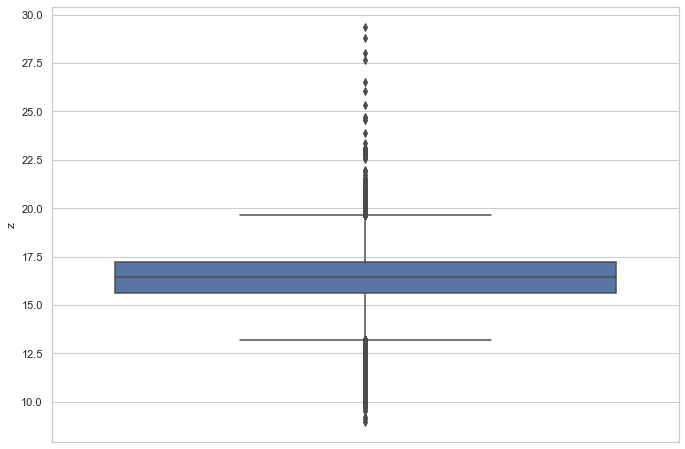

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='z', data=df, orient="v")

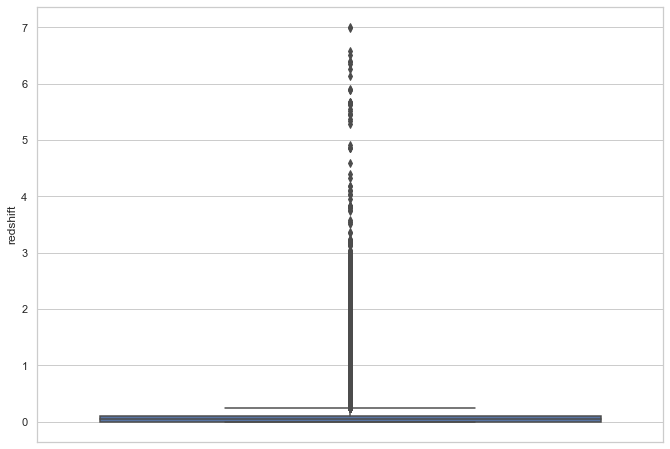

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='redshift', data=df, orient="v")

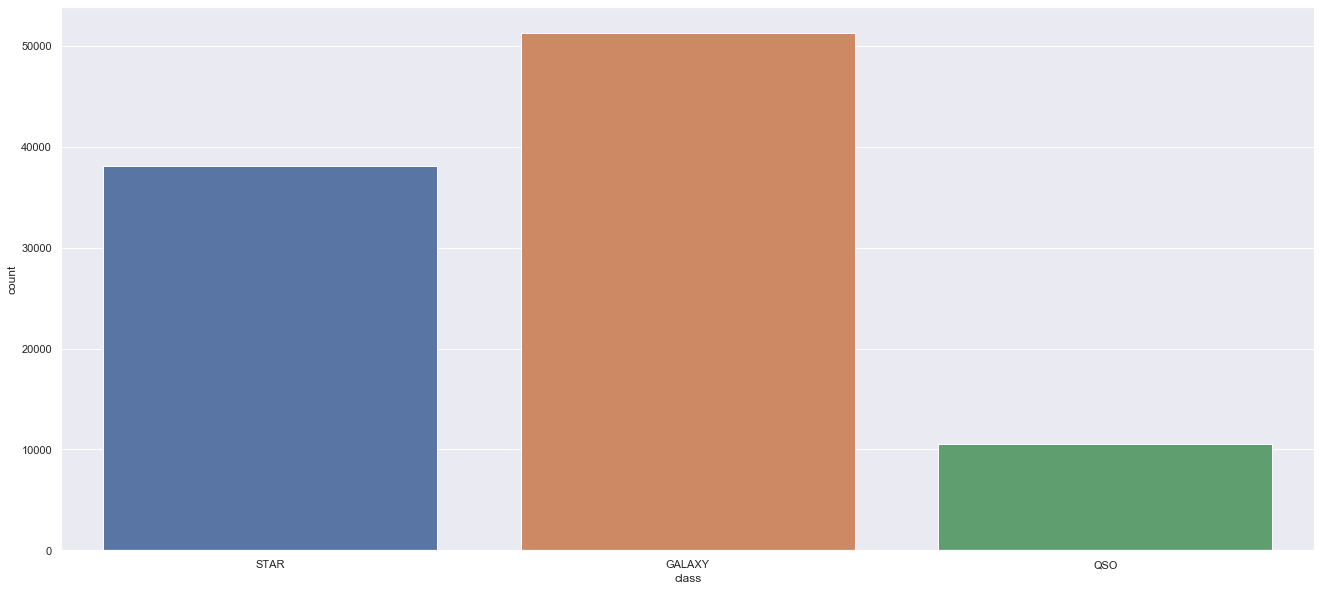

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='class', data=df)

In [16]:
df.corr()

,ra,dec,u,g,r,i,z,redshift
ra,1.000000,0.076869,0.020903,0.017404,0.012410,0.006191,0.001267,-0.006616
dec,0.076869,1.000000,-0.027315,-0.013263,-0.004657,-0.001074,0.004785,0.011340
u,0.020903,-0.027315,1.000000,0.843252,0.692903,0.615987,0.562021,0.172663
g,0.017404,-0.013263,0.843252,1.000000,0.956717,0.915003,0.886663,0.422311
r,0.012410,-0.004657,0.692903,0.956717,1.000000,0.976051,0.961456,0.453376
i,0.006191,-0.001074,0.615987,0.915003,0.976051,1.000000,0.977189,0.449680
z,0.001267,0.004785,0.562021,0.886663,0.961456,0.977189,1.000000,0.440964
redshift,-0.006616,0.011340,0.172663,0.422311,0.453376,0.449680,0.440964,1.000000


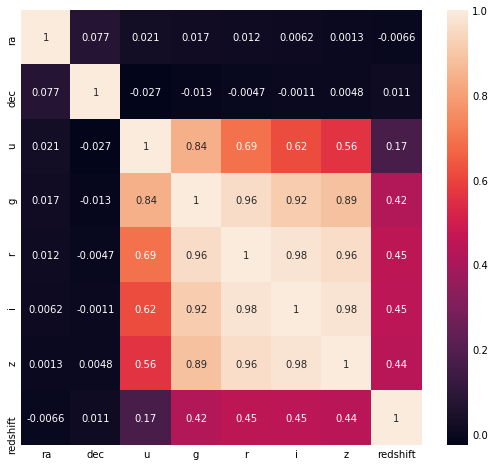

In [4]:
f, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

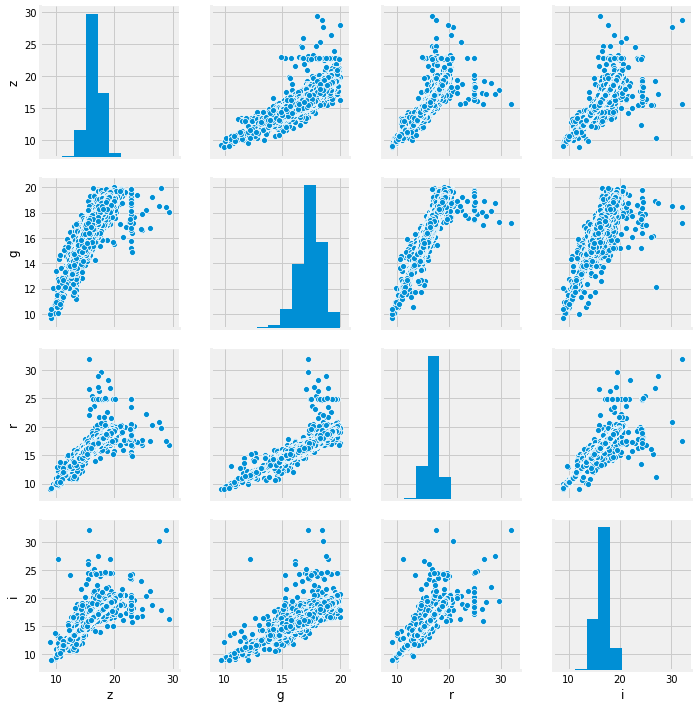

In [5]:
sns.pairplot(df[['z', 'g', 'r', 'i']])

# PCA

In [19]:
pca_val = df[['g', 'r', 'i', 'z']]
pca = PCA(n_components=1)
pca_val = pca.fit_transform(pca_val)
pca_val = pca_val.reshape(-1,)

In [20]:
pca_val = pd.Series(pca_val, name='pca_val')
df = pd.concat([df, pca_val], axis=1)
df.drop(['g', 'r', 'i', 'z'], axis=1, inplace=True)
df.head()

,ra,dec,u,class,redshift,pca_val
0,47.372545,0.820621,18.69254,STAR,0.000115,-0.580212
1,116.303083,42.455980,18.47633,STAR,-0.000093,1.007619
2,172.756623,-8.785698,16.47714,STAR,0.000165,-2.350122
3,201.224207,28.771290,18.63561,GALAXY,0.058155,-1.658513
4,212.817222,26.625225,18.88325,GALAXY,0.072210,1.099803


In [21]:
X = df.drop('class', axis=1)
y = df['class']
y.value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

In [22]:
df["class"] = df["class"].astype('category')
df.dtypes

ra           float64
dec          float64
u            float64
class       category
redshift     float64
pca_val      float64
dtype: object

In [23]:
df["class_1"] = df["class"].cat.codes
df.head()

,ra,dec,u,class,redshift,pca_val,class_1
0,47.372545,0.820621,18.69254,STAR,0.000115,-0.580212,2
1,116.303083,42.455980,18.47633,STAR,-0.000093,1.007619,2
2,172.756623,-8.785698,16.47714,STAR,0.000165,-2.350122,2
3,201.224207,28.771290,18.63561,GALAXY,0.058155,-1.658513,0
4,212.817222,26.625225,18.88325,GALAXY,0.072210,1.099803,0


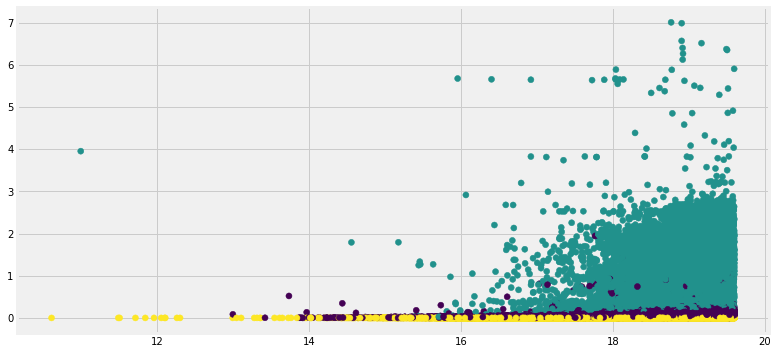

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(x=df['u'],y=df['redshift'],c=df['class_1'])

# Create Training and Test Sets and Apply Scaling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=5)
X_train_feature_imp = X_train
X_train = X_train.values
X_dev = X_dev.values
X_test = X_test.values

In [26]:
le = LabelEncoder()
y = le.fit_transform(y)

# Logistic Regression

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on test set: 0.94


C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\w

Text(0.5, 1.0, 'Performance on Training set and Dev set')

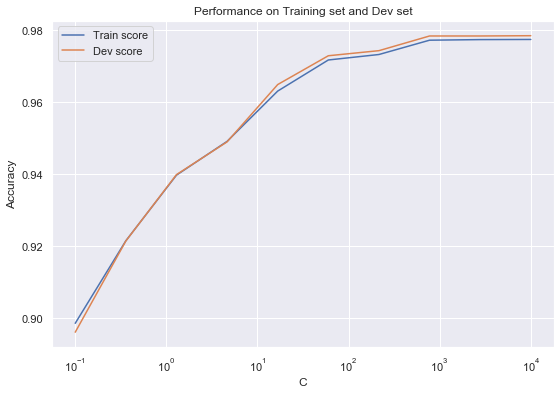

In [28]:
C = np.logspace(-1, 4, 10)
accuracy_train = []
accuracy_dev = []
for i in C:
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.semilogx(C, accuracy_train, label='Train score')
plt.semilogx(C, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

In [29]:
clf = LogisticRegression(C=900)
clf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, clf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, clf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, clf.predict(X_dev))))

C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\w15to\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set: 
Accuracy: 0.9772179930795848
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.98     37059
         QSO       0.98      0.93      0.95      7682
        STAR       0.97      0.99      0.98     27509

    accuracy                           0.98     72250
   macro avg       0.98      0.97      0.97     72250
weighted avg       0.98      0.98      0.98     72250


Dev set: 
Accuracy: 0.9782745098039216
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.98      6547
         QSO       0.97      0.94      0.96      1306
        STAR       0.97      0.99      0.98      4897

    accuracy                           0.98     12750
   macro avg       0.98      0.97      0.97     12750
weighted avg       0.98      0.98      0.98     12750



# Random Forest

Text(0.5, 1.0, 'Performance on Training set and Dev set')

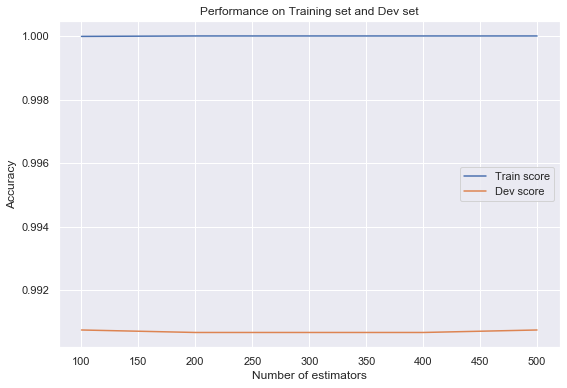

In [30]:
n_estimators = [100, 200, 300, 400, 500]
accuracy_train = []
accuracy_dev = []
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i, random_state=10)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(n_estimators, accuracy_train, label='Train score')
plt.plot(n_estimators, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

In [31]:
clf = RandomForestClassifier(n_estimators=300, random_state=10)
clf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, clf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, clf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, clf.predict(X_dev))))

Training set: 
Accuracy: 1.0
Classification report:
              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     37059
         QSO       1.00      1.00      1.00      7682
        STAR       1.00      1.00      1.00     27509

    accuracy                           1.00     72250
   macro avg       1.00      1.00      1.00     72250
weighted avg       1.00      1.00      1.00     72250


Dev set: 
Accuracy: 0.9906666666666667
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      6547
         QSO       0.98      0.94      0.96      1306
        STAR       1.00      1.00      1.00      4897

    accuracy                           0.99     12750
   macro avg       0.99      0.98      0.98     12750
weighted avg       0.99      0.99      0.99     12750



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


Text(0.5, 1.0, 'Performance on Training set and Dev set')

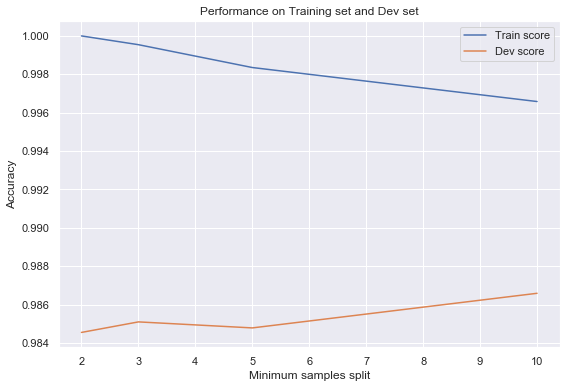

In [33]:
min_samples_split = [2, 3, 5, 10]
accuracy_train = []
accuracy_dev = []
for i in min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split=i, random_state=25, min_samples_leaf=1)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(min_samples_split, accuracy_train, label='Train score')
plt.plot(min_samples_split, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Minimum samples split')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

Text(0.5, 1.0, 'Performance on Training set and Dev set')

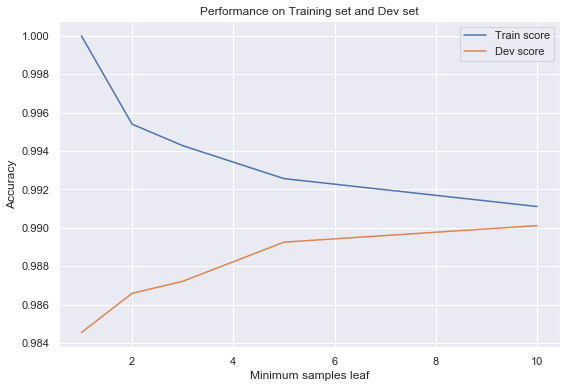

In [34]:
min_samples_leaf = [1, 2, 3, 5, 10]
accuracy_train = []
accuracy_dev = []
for i in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=i, random_state=25)
    clf.fit(X_train, y_train)
    accr = accuracy_score(y_train, clf.predict(X_train))
    accuracy_train.append(accr)
    accr = accuracy_score(y_dev, clf.predict(X_dev))
    accuracy_dev.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(min_samples_leaf, accuracy_train, label='Train score')
plt.plot(min_samples_leaf, accuracy_dev, label='Dev score')
plt.legend(loc='best')
plt.xlabel('Minimum samples leaf')
plt.ylabel('Accuracy')
plt.title('Performance on Training set and Dev set')

In [35]:
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9, random_state=25)
clf.fit(X_train, y_train)
print('Training set: ')
print('Accuracy: {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print('Classification report:\n{}'.format(classification_report(y_train, clf.predict(X_train))))
print('\nDev set: ')
print('Accuracy: {}'.format(accuracy_score(y_dev, clf.predict(X_dev))))
print('Classification report:\n{}'.format(classification_report(y_dev, clf.predict(X_dev))))

Training set: 
Accuracy: 0.9913079584775086
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99     37059
         QSO       0.98      0.95      0.96      7682
        STAR       1.00      1.00      1.00     27509

    accuracy                           0.99     72250
   macro avg       0.99      0.98      0.98     72250
weighted avg       0.99      0.99      0.99     72250


Dev set: 
Accuracy: 0.9898823529411764
Classification report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      6547
         QSO       0.97      0.94      0.96      1306
        STAR       1.00      1.00      1.00      4897

    accuracy                           0.99     12750
   macro avg       0.99      0.98      0.98     12750
weighted avg       0.99      0.99      0.99     12750



# LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.76
Accuracy of LDA classifier on test set: 0.76


# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.98
Accuracy of GNB classifier on test set: 0.98


# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.78


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6671   18 1028]
 [ 217 1166  210]
 [1626  162 3902]]
              precision    recall  f1-score   support

      GALAXY       0.78      0.86      0.82      7717
         QSO       0.87      0.73      0.79      1593
        STAR       0.76      0.69      0.72      5690

    accuracy                           0.78     15000
   macro avg       0.80      0.76      0.78     15000
weighted avg       0.78      0.78      0.78     15000

